In [1]:
import numpy as np
import matplotlib.pyplot as plt

from framework_pkg.framework import FrameWork
from framework_pkg.survival_probablity import MSW , ULDM

plt.rcParams['text.usetex']=True
plt.style.use('classic')

param = {'SinT12': 0.308, 'T13': 8.57, 'M12': 7.5e-5,
         'mdm' : 1e-3, 'mu2': 1e-4, 'mu1': 0, 'alpha' : 0, 'epsx':1, 'epsy':0 }

Enu   = np.logspace(-1, np.log10(16), 300)

In [2]:
frame = FrameWork()


msw_sp = MSW(param, Enu)
uldm_sp, _, ls = ULDM(param, Enu)

#peanuts_B8 = np.loadtxt('Data/peanuts_B8.txt')
#peanuts_B8M = np.loadtxt('Data/peanuts_B8M.txt')

In [17]:
uldm_sp_av = np.mean(uldm_sp/ls**2 , axis=0)

print(uldm_sp_av)

[0.5460706  0.54602104 0.54597062 0.54591932 0.54586712 0.54581401
 0.54575997 0.54570498 0.54564903 0.54559209 0.54553417 0.54547522
 0.54541524 0.54535421 0.54529211 0.54522892 0.54516461 0.54509918
 0.5450326  0.54496484 0.5448959  0.54482574 0.54475434 0.54468169
 0.54460775 0.54453251 0.54445595 0.54437803 0.54429874 0.54421804
 0.54413592 0.54405235 0.54396729 0.54388073 0.54379264 0.54370298
 0.54361174 0.54351888 0.54342436 0.54332817 0.54323027 0.54313063
 0.54302921 0.54292599 0.54282093 0.54271399 0.54260515 0.54249437
 0.5423816  0.54226682 0.54214999 0.54203107 0.54191001 0.54178679
 0.54166136 0.54153367 0.5414037  0.54127138 0.54113669 0.54099957
 0.54085999 0.54071788 0.54057322 0.54042594 0.540276   0.54012335
 0.53996794 0.53980971 0.53964862 0.5394846  0.5393176  0.53914758
 0.53897445 0.53879818 0.5386187  0.53843595 0.53824986 0.53806037
 0.53786742 0.53767093 0.53747085 0.5372671  0.53705962 0.53684832
 0.53663314 0.536414   0.53619083 0.53596354 0.53573205 0.5354

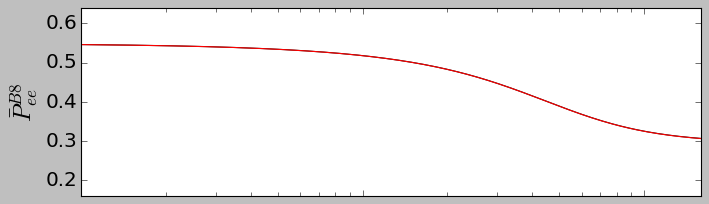

In [12]:
plt.rcParams.update({'font.size': 18})
fig  = plt.figure(figsize=(10,10))

fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(311)
ax1.set_ylim(0.16,0.64)
ax1.set_xlim(0.1,16)
ax1.set_xscale('log')

ax1.tick_params(axis='both', which='minor', length=4)
ax1.tick_params(axis='both', which='major', length=5)

#ax1.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=18)
ax1.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax1.plot(Enu, msw_sp, 'k-')
ax1.plot(Enu, uldm_sp_av, 'r-')



#plt.plot(peanuts_B8[:,0],peanuts_B8[:,1],'b.')
#plt.plot(peanuts_B8M[:,0],peanuts_B8M[:,1],'r-')